In [1]:
import json

import IPython
from PIL import Image
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0-rc0'

In [3]:
imported = tf.saved_model.load("models/image_stylization/export_serving/transform_net")
model = imported.signatures["serving_default"]

In [4]:
def stylize_and_save_image(img, style_weights, out_path):
    im = tf.expand_dims(img, 0)
    style_weights = tf.expand_dims(style_weights, 0)
    outputs = model(image=tf.cast(im, tf.float32), style_weights=style_weights)
    outputs = tf.cast(tf.round(outputs["output"]), tf.uint8)
    Image.fromarray(outputs[0].numpy()).save(out_path)

In [5]:
img = tf.image.decode_image(tf.io.read_file("./images/content_targets/katya.jpg"))

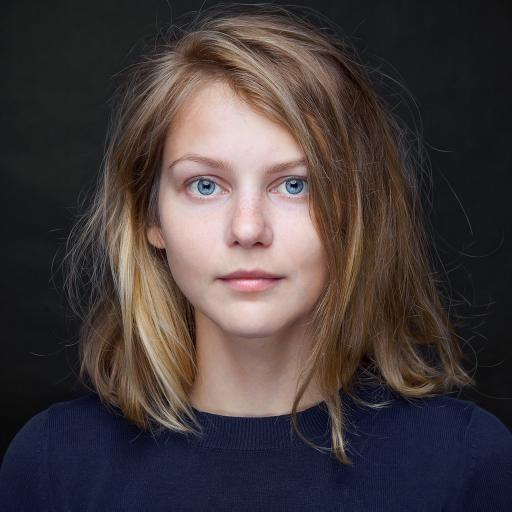

In [6]:
IPython.display.Image("./images/content_targets/katya.jpg")

In [7]:
style_index = {}
n_styles = 0
with open("models/image_stylization/style_targets.json") as f:
    d = json.load(f)
    n_styles = len(d)
    for i, f in enumerate(d):
        print(f, i)
        style_index[f.split(".")[0]] = i

claude_monet__poppy_field_in_argenteuil.jpg 0
edvard_munch__the_scream.jpg 1
egon_schiele__edith_with_striped_dress.jpg 2
frederic_edwin_church__eruption_at_cotopaxi.jpg 3
henri_de_toulouse-lautrec__divan_japonais.jpg 4
hokusai__the_great_wave_off_kanagawa.jpg 5
joseph_william_turner__the_shipwreck_of_the_minotaur.jpg 6
leonid_afremov__rain_princess.jpg 7
louvre_udnie.jpg 8
nicolas_poussin__landscape_with_a_calm.jpg 9
pablo_picasso__la_muse.jpg 10
paul_signac__cassis_cap_lombard.jpg 11
pillars_of_creation.jpg 12
vincent_van_gogh__the_starry_night.jpg 13
wassily_kandinsky__white_zig_zags.jpg 14
wolfgang_lettl__the_trial.jpg 15


In [8]:
style_weights = tf.eye(n_styles, dtype=tf.float32)

In [9]:
for i, style_weight in enumerate(style_weights):
    stylize_and_save_image(img, style_weight, "images/image_stylization/results/%s.jpg" % i)

### Artistic Styles

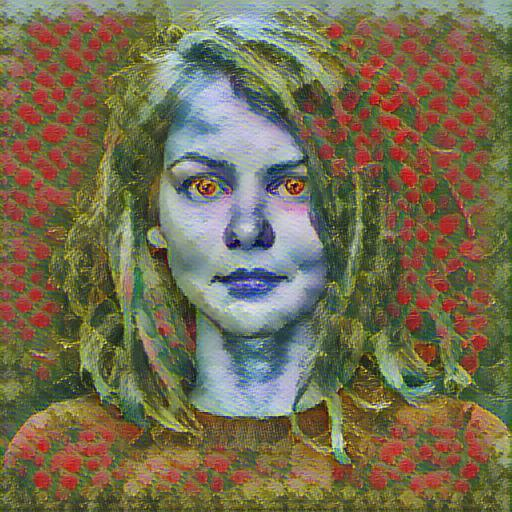

In [10]:
IPython.display.Image("images/image_stylization/results/0.jpg")

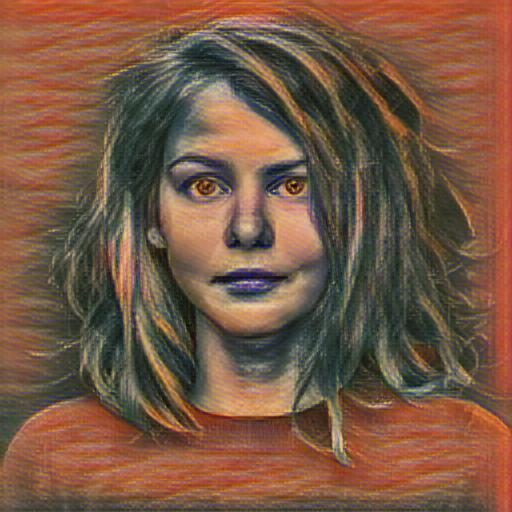

In [11]:
IPython.display.Image("images/image_stylization/results/1.jpg")

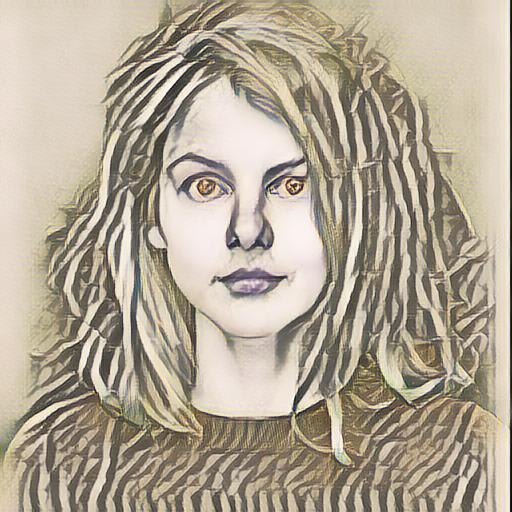

In [12]:
IPython.display.Image("images/image_stylization/results/2.jpg")

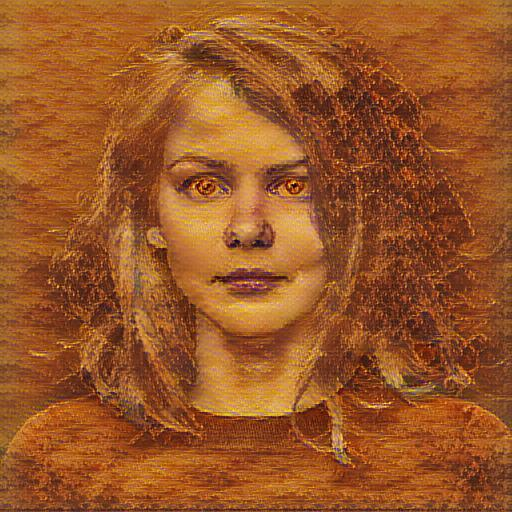

In [13]:
IPython.display.Image("images/image_stylization/results/3.jpg")

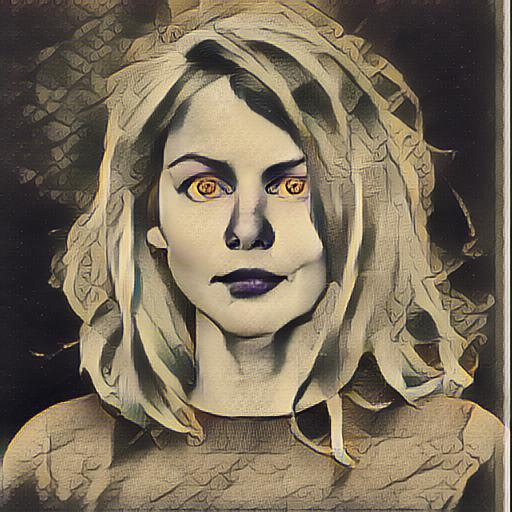

In [14]:
IPython.display.Image("images/image_stylization/results/4.jpg")

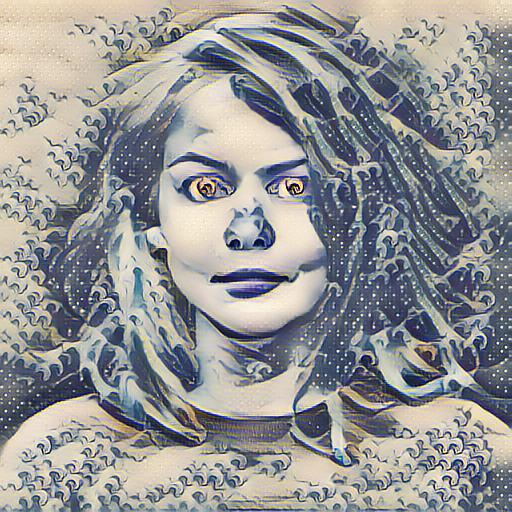

In [15]:
IPython.display.Image("images/image_stylization/results/5.jpg")

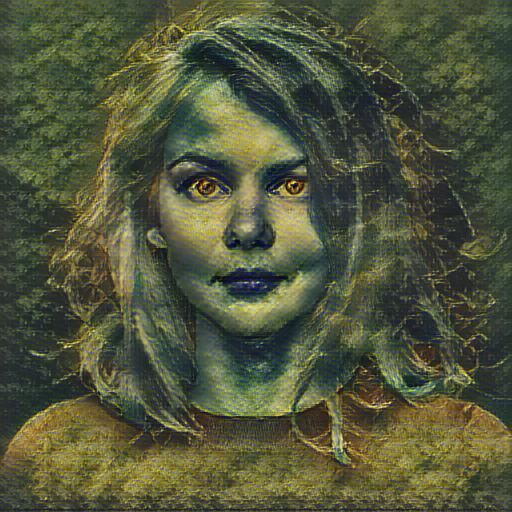

In [16]:
IPython.display.Image("images/image_stylization/results/6.jpg")

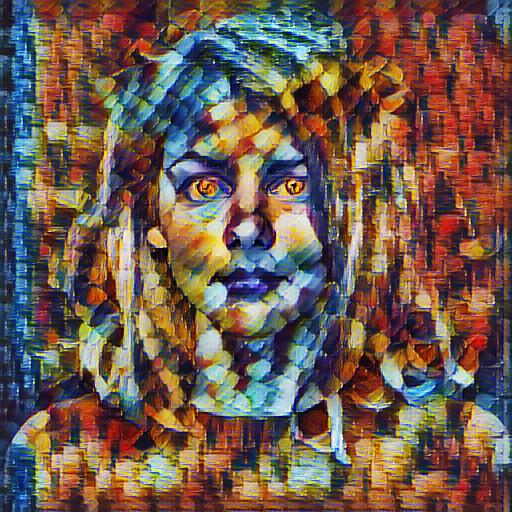

In [17]:
IPython.display.Image("images/image_stylization/results/7.jpg")

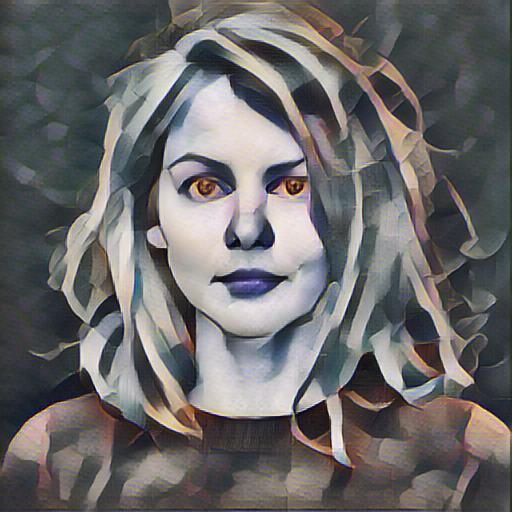

In [18]:
IPython.display.Image("images/image_stylization/results/8.jpg")

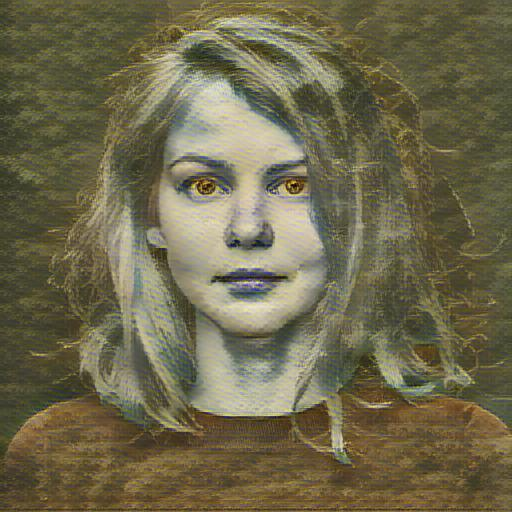

In [19]:
IPython.display.Image("images/image_stylization/results/9.jpg")

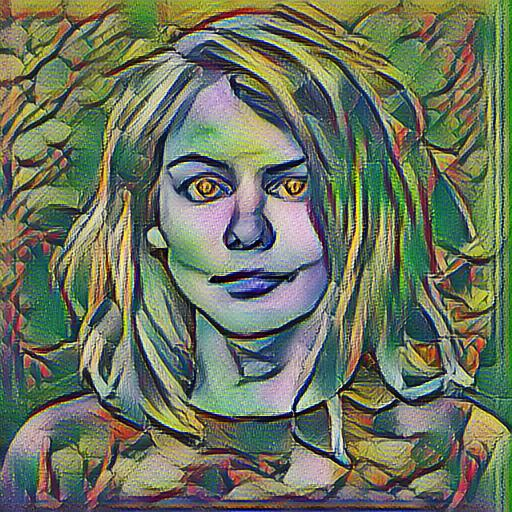

In [20]:
IPython.display.Image("images/image_stylization/results/10.jpg")

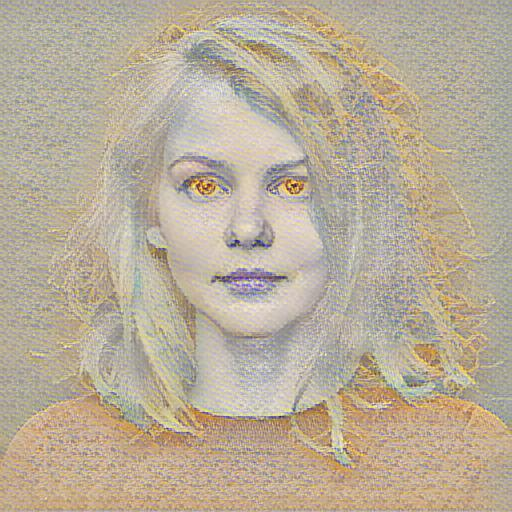

In [21]:
IPython.display.Image("images/image_stylization/results/11.jpg")

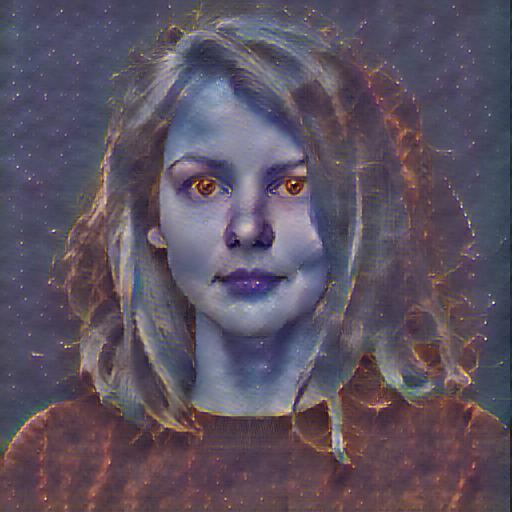

In [22]:
IPython.display.Image("images/image_stylization/results/12.jpg")

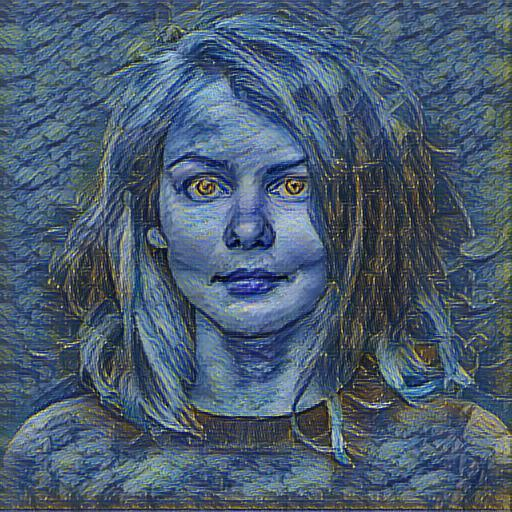

In [23]:
IPython.display.Image("images/image_stylization/results/13.jpg")

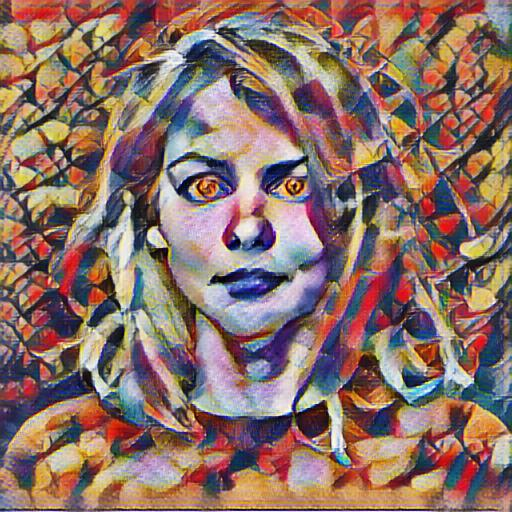

In [24]:
IPython.display.Image("images/image_stylization/results/14.jpg")

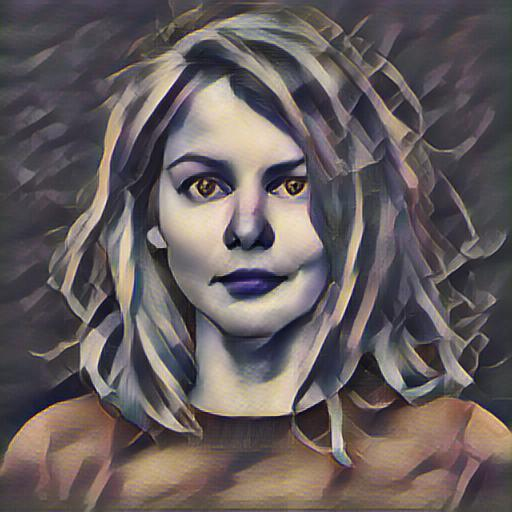

In [25]:
IPython.display.Image("images/image_stylization/results/15.jpg")

### Mixing edith(2) with udnie(8)

In [26]:
style_weights = [0.0] * n_styles
style_weights[2] = 0.5
style_weights[8] = 0.5
style_weights = tf.constant(style_weights, dtype=tf.float32)

In [27]:
stylize_and_save_image(img, style_weights, "images/image_stylization/results/edith_udnie.jpg")

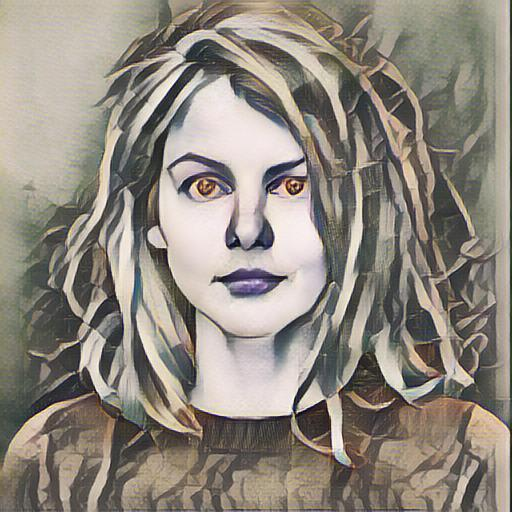

In [28]:
IPython.display.Image("images/image_stylization/results/edith_udnie.jpg")

### Mixing Pillars of Creation(12) with Starry Night(13)

In [29]:
style_weights = [0.0] * n_styles
style_weights[12] = 0.5
style_weights[13] = 0.5
style_weights = tf.constant(style_weights, dtype=tf.float32)

In [30]:
stylize_and_save_image(img, style_weights, "images/image_stylization/results/pillars_of_creation__starry_night.jpg")

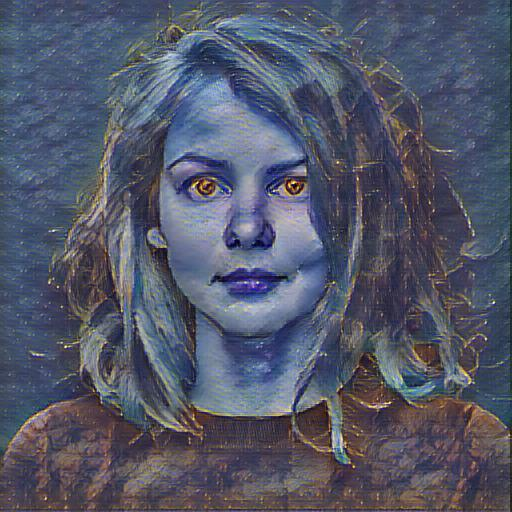

In [31]:
IPython.display.Image("images/image_stylization/results/pillars_of_creation__starry_night.jpg")

### Mixing Eruption at Cotopaxi (3) with The Great Wave off Kanagawa (5)

In [32]:
style_weights = [0.0] * n_styles
style_weights[3] = 0.5
style_weights[5] = 0.5
style_weights = tf.constant(style_weights, dtype=tf.float32)

In [33]:
stylize_and_save_image(img, style_weights, "images/image_stylization/results/eruption_at_cotopaxi__the_great_wave_off_kanagawa.jpg")

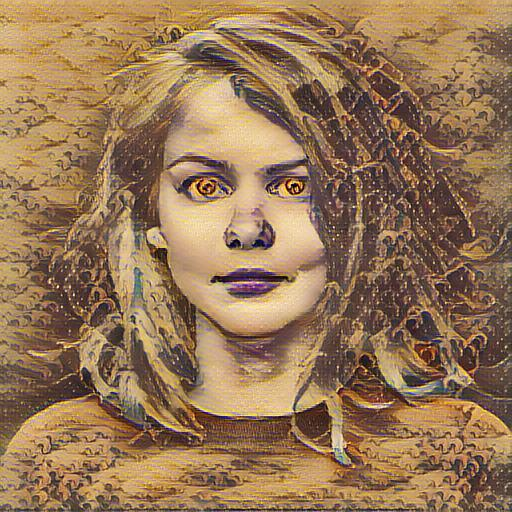

In [34]:
IPython.display.Image("images/image_stylization/results/eruption_at_cotopaxi__the_great_wave_off_kanagawa.jpg")

### Mixing Edith with Striped Dress(2), The Great Wave off Kanagawa(5) and Rain Princess(7)

In [35]:
style_weights = [0.0] * n_styles
style_weights[2] = 0.33
style_weights[5] = 0.33
style_weights[7] = 0.34
style_weights = tf.constant(style_weights, dtype=tf.float32)

In [36]:
stylize_and_save_image(img, style_weights, "images/image_stylization/results/edith_with_striped_dress__the_great_wave_off_kanagawa__rain_princess.jpg")

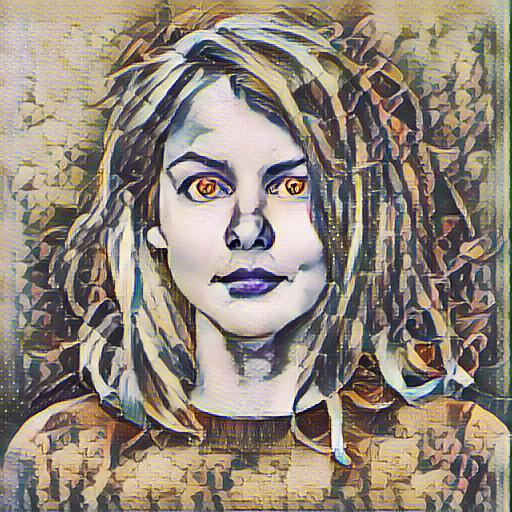

In [37]:
IPython.display.Image("images/image_stylization/results/edith_with_striped_dress__the_great_wave_off_kanagawa__rain_princess.jpg")

### 2, 5, 8, 13

In [38]:
style_weights = [0.0] * n_styles
style_weights[2] = 0.25
style_weights[5] = 0.25
style_weights[8] = 0.25
style_weights[13] = 0.25
style_weights = tf.constant(style_weights, dtype=tf.float32)

In [39]:
stylize_and_save_image(img, style_weights, "images/image_stylization/results/edith_with_striped_dress__the_great_wave_off_kanagawa__louvre_udnie__starry_night.jpg")

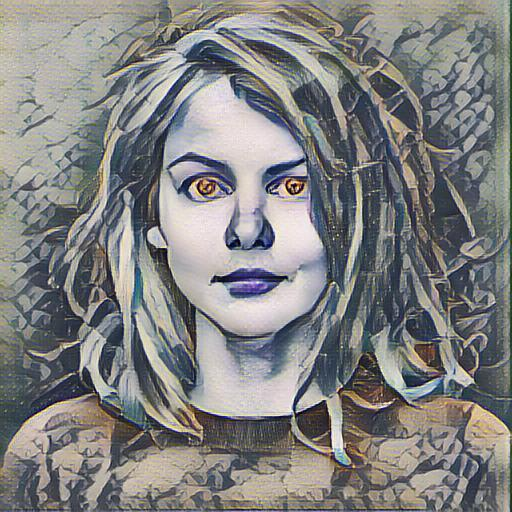

In [40]:
IPython.display.Image("images/image_stylization/results/edith_with_striped_dress__the_great_wave_off_kanagawa__louvre_udnie__starry_night.jpg")

### Comic Styles

In [41]:
imported = tf.saved_model.load("models/image_stylization_large/export_serving/transform_net")

In [42]:
model = imported.signatures["serving_default"]

In [43]:
style_index = {}
n_styles = 0
with open("models/image_stylization_large/style_targets.json") as f:
    d = json.load(f)
    n_styles = len(d)
    for i, f in enumerate(d):
        print(f, i)
        style_index[f.split(".")[0]] = i

claude_monet__poppy_field_in_argenteuil.jpg 0
edvard_munch__the_scream.jpg 1
egon_schiele__edith_with_striped_dress.jpg 2
frederic_edwin_church__eruption_at_cotopaxi.jpg 3
henri_de_toulouse-lautrec__divan_japonais.jpg 4
hokusai__the_great_wave_off_kanagawa.jpg 5
joseph_william_turner__the_shipwreck_of_the_minotaur.jpg 6
leonid_afremov__rain_princess.jpg 7
louvre_udnie.jpg 8
nicolas_poussin__landscape_with_a_calm.jpg 9
pablo_picasso__la_muse.jpg 10
paul_signac__cassis_cap_lombard.jpg 11
pillars_of_creation.jpg 12
vincent_van_gogh__the_starry_night.jpg 13
wassily_kandinsky__white_zig_zags.jpg 14
wolfgang_lettl__the_trial.jpg 15
archer__adam_reed.jpg 16
batman_the_animated_series__bruce_timm.jpg 17
ben_10__joe_casey_joe_kelly__cartoon_network.jpg 18
dexters_laboratory__grenndy_taratkovsky.jpg 19
dora_the_explorer__chris_glifford.jpg 20
dragon_ball_z__akira_toriyama.jpg 21
family_guy__seth_macfarlane.jpg 22
g_i_joe__sunbow.jpg 23
garfield__jim_davis.jpg 24
johnny_bravo__van_partible.jpg 25

In [44]:
img = tf.image.decode_image(tf.io.read_file("./images/content_targets/katya.jpg"))

In [45]:
style_weights = tf.eye(n_styles, dtype=tf.float32)

In [46]:
for i in range(16):
    stylize_and_save_image(img, style_weights[i + 16], "images/image_stylization_large/results/%s.jpg" % i)

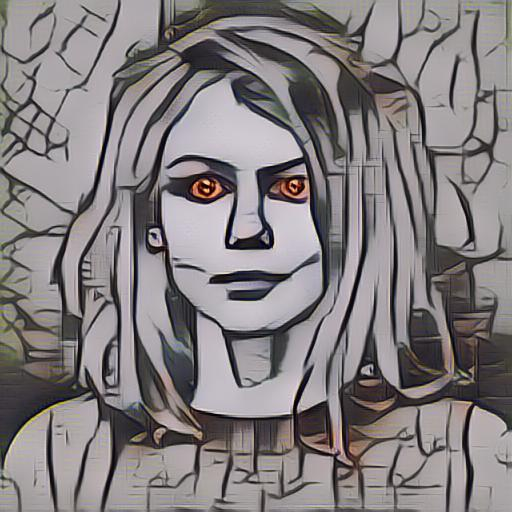

In [47]:
IPython.display.Image("images/image_stylization_large/results/0.jpg")

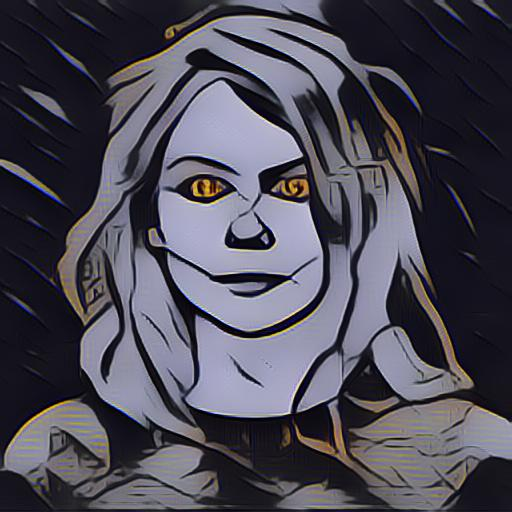

In [48]:
IPython.display.Image("images/image_stylization_large/results/1.jpg")

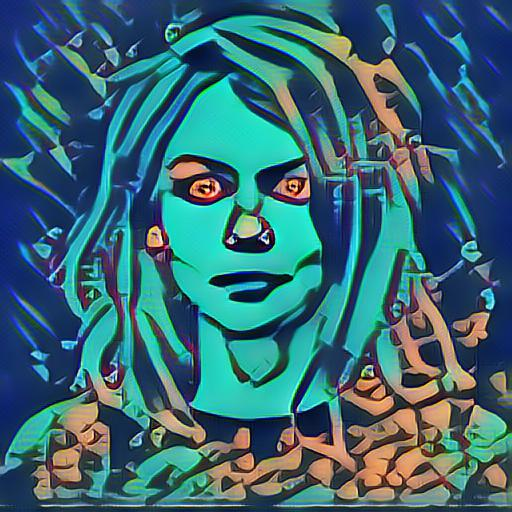

In [49]:
IPython.display.Image("images/image_stylization_large/results/2.jpg")

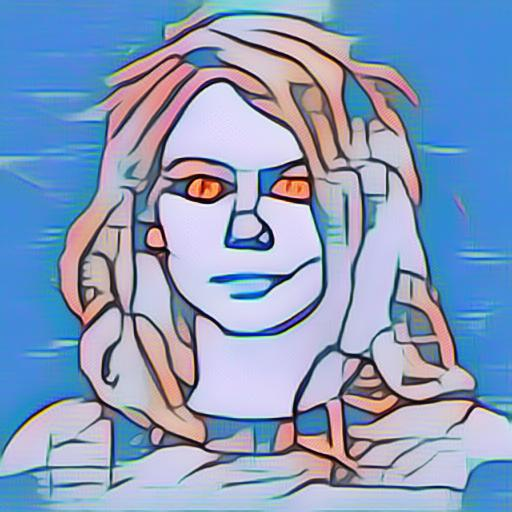

In [50]:
IPython.display.Image("images/image_stylization_large/results/3.jpg")

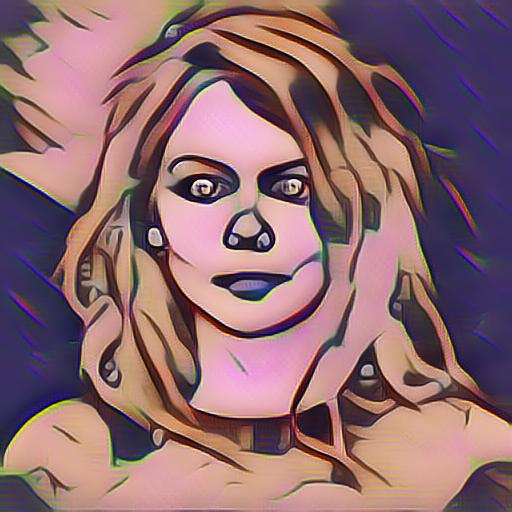

In [51]:
IPython.display.Image("images/image_stylization_large/results/4.jpg")

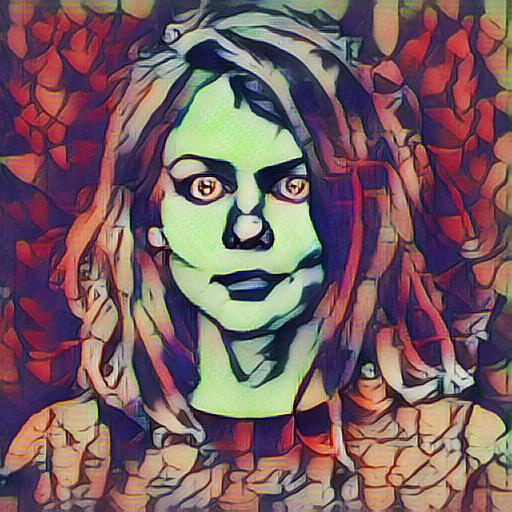

In [52]:
IPython.display.Image("images/image_stylization_large/results/5.jpg")

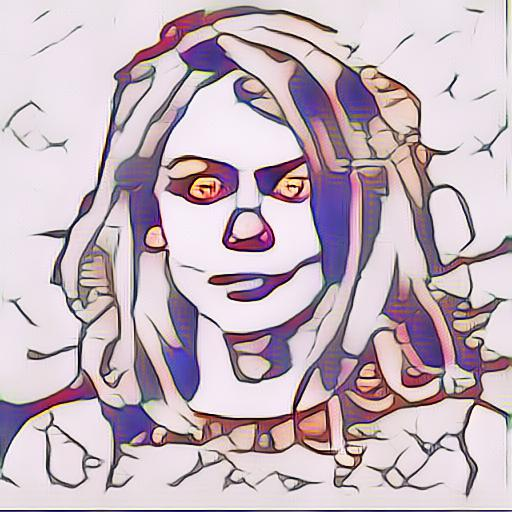

In [53]:
IPython.display.Image("images/image_stylization_large/results/6.jpg")

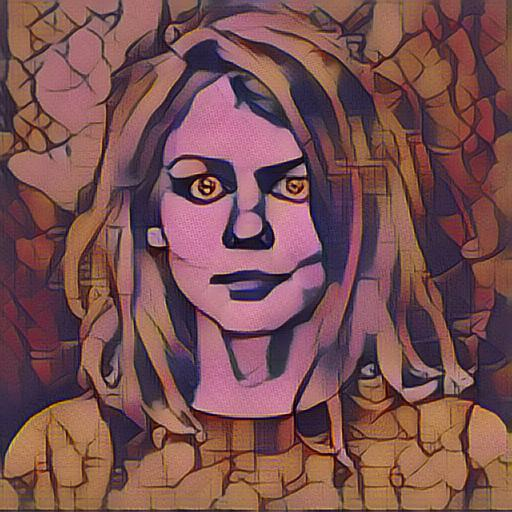

In [54]:
IPython.display.Image("images/image_stylization_large/results/7.jpg")

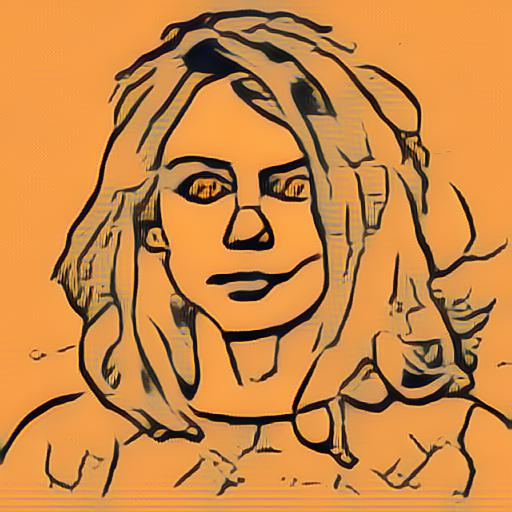

In [55]:
IPython.display.Image("images/image_stylization_large/results/8.jpg")

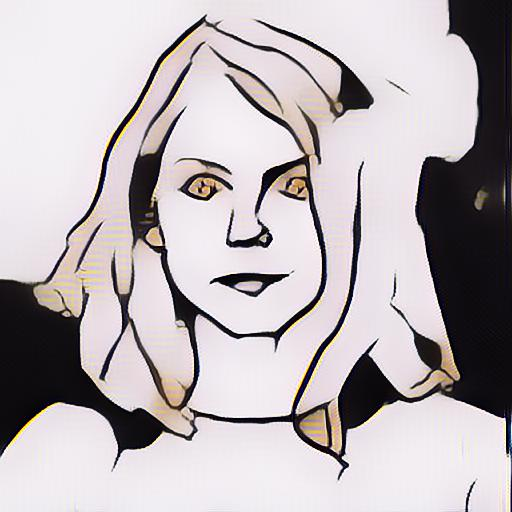

In [56]:
IPython.display.Image("images/image_stylization_large/results/9.jpg")

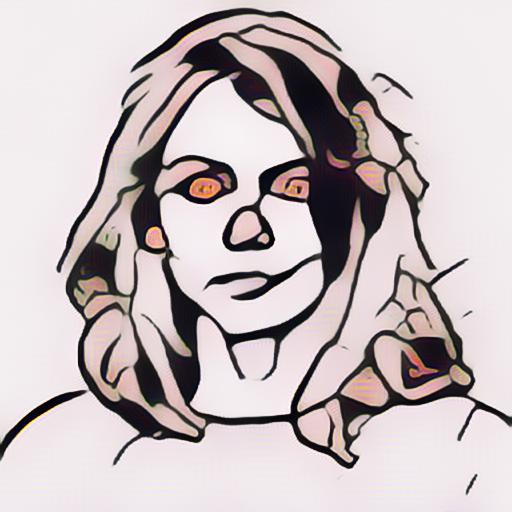

In [57]:
IPython.display.Image("images/image_stylization_large/results/10.jpg")

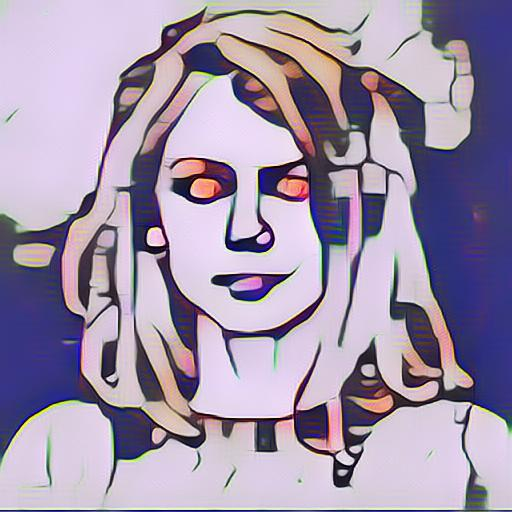

In [58]:
IPython.display.Image("images/image_stylization_large/results/11.jpg")

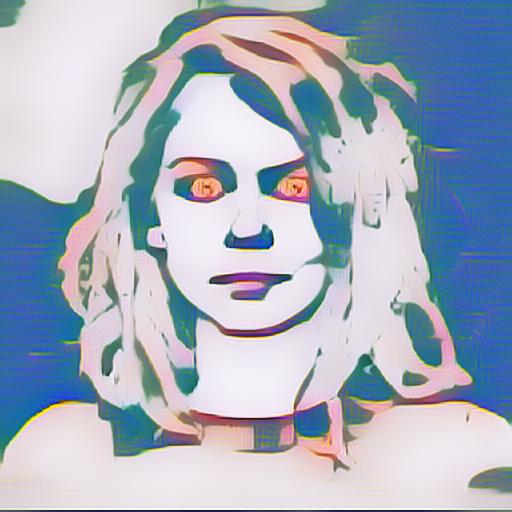

In [59]:
IPython.display.Image("images/image_stylization_large/results/12.jpg")

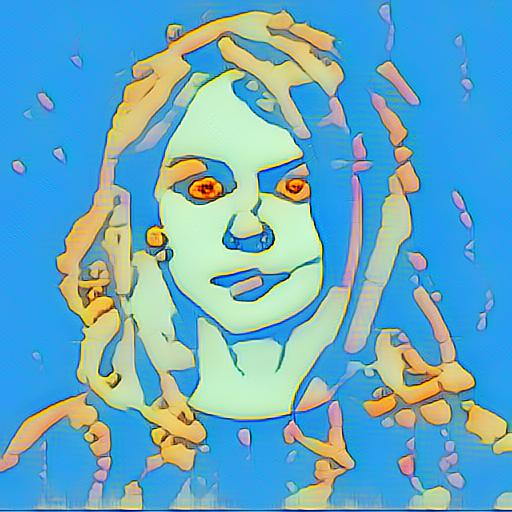

In [60]:
IPython.display.Image("images/image_stylization_large/results/13.jpg")

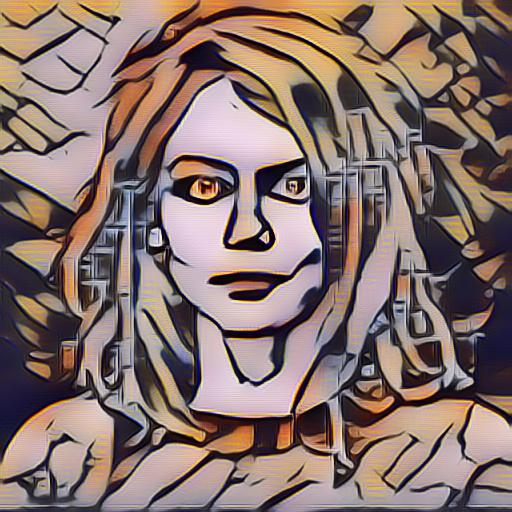

In [61]:
IPython.display.Image("images/image_stylization_large/results/14.jpg")

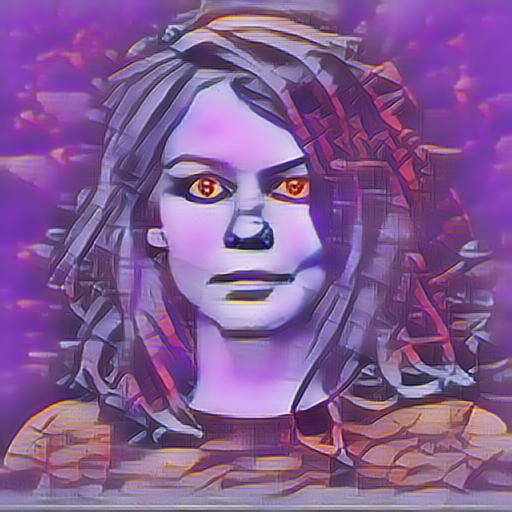

In [62]:
IPython.display.Image("images/image_stylization_large/results/15.jpg")